In [1]:
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_train[78])
print(y_train[78])

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_train /= (2 * std)

x_test -= mean
x_test /= (2 * std)

57344/57026 [==============================] - 0s 8us/step
(404, 13)
(404,)
[1.7171e-01 2.5000e+01 5.1300e+00 0.0000e+00 4.5300e-01 5.9660e+00
 9.3400e+01 6.8185e+00 8.0000e+00 2.8400e+02 1.9700e+01 3.7808e+02
 1.4440e+01]
16.0


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(13,)))

model.compile(loss='mse', optimizer='sgd')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(x_train, y_train, epochs=20, batch_size = 32)

Epoch 1/20
404/404 [==============================] - 0s 458us/step - loss: 480.8206
Epoch 2/20
404/404 [==============================] - 0s 54us/step - loss: 298.3005
Epoch 3/20
404/404 [==============================] - 0s 51us/step - loss: 191.4316
Epoch 4/20
404/404 [==============================] - 0s 56us/step - loss: 128.1690
Epoch 5/20
404/404 [==============================] - 0s 62us/step - loss: 90.6248
Epoch 6/20
404/404 [==============================] - 0s 54us/step - loss: 67.8176
Epoch 7/20
404/404 [==============================] - 0s 69us/step - loss: 53.8302
Epoch 8/20
404/404 [==============================] - 0s 55us/step - loss: 45.1952
Epoch 9/20
404/404 [==============================] - 0s 37us/step - loss: 39.6030
Epoch 10/20
404/404 [==============================] - 0s 67us/step - loss: 35.8838
Epoch 11/20
404/404 [==============================] - 0s 67us/step - loss: 33.4271
Epoch 12/20
404/404 [==============================] - 0s 61us/step - loss: 31.6

In [6]:
preds = model.predict(x_test)

In [7]:
print(model.get_weights())

[array([[-1.3575249 ],
       [ 1.6747288 ],
       [-0.8427883 ],
       [ 1.988256  ],
       [-1.180578  ],
       [ 5.3827424 ],
       [-0.32037437],
       [-2.350639  ],
       [ 0.42202872],
       [-0.95230585],
       [-2.687918  ],
       [ 1.3881271 ],
       [-5.218858  ]], dtype=float32), array([22.290987], dtype=float32)]


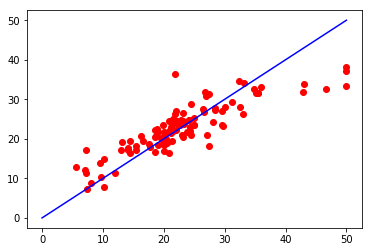

In [9]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,50], [0,50], 'b')